In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [13]:
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})
df

,beta,exponential,normal_p,normal_l
0,35.925847,19.922979,9.309198,13.687169
1,58.244346,2.983753,13.532660,12.270991
2,38.144940,17.763183,13.205793,-14.241433
3,56.312440,1.176329,11.759392,11.727414
4,57.166061,6.402556,6.885236,-0.944473
...,...,...,...,...
995,48.381924,4.806377,8.676279,3.395455
996,51.581389,4.015687,11.816345,9.485888
997,50.194894,15.357584,9.427833,4.711468
998,58.218580,1.376318,12.523553,9.622056


In [14]:
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal

In [15]:
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,35.925847,19.922979,9.309198,13.687169,20.921477
1,58.244346,2.983753,13.532660,12.270991,25.679959
2,38.144940,17.763183,13.205793,-14.241433,21.125108
3,56.312440,1.176329,11.759392,11.727414,23.429251
4,57.166061,6.402556,6.885236,-0.944473,28.016133


<Axes: ylabel='Density'>

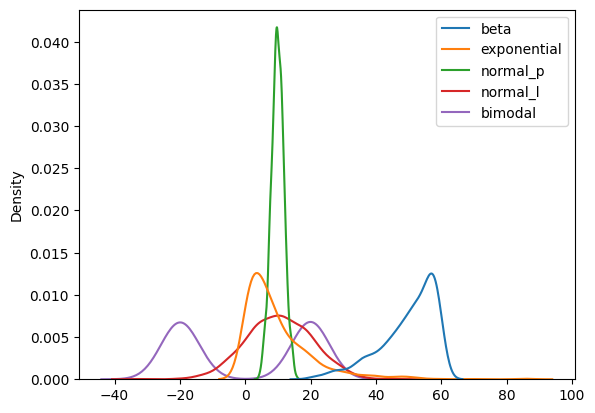

In [16]:
sns.kdeplot(data=df)

In [17]:
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.894408,9.967406,9.931195,10.458059,0.053680
std,8.633203,10.557650,1.909310,10.066980,20.126506
min,20.406653,0.015588,4.373590,-33.168623,-28.867781
25%,45.285210,2.844445,8.679876,3.688814,-19.946328
50%,52.106906,6.639374,9.910833,10.423800,0.159567
75%,56.948294,13.528818,11.226701,17.584306,20.021569
max,59.988168,86.040814,15.555049,46.271602,29.087489


<Axes: ylabel='Density'>

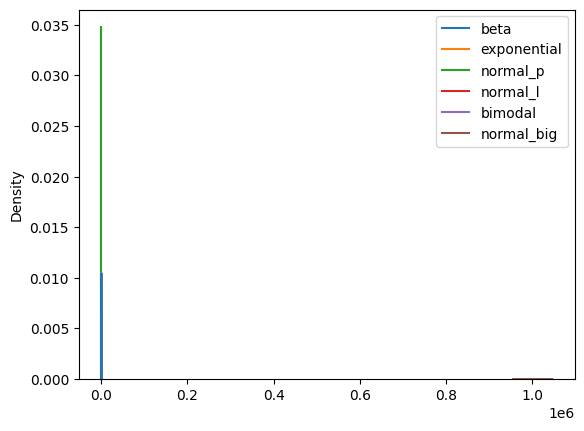

In [19]:
normal_big = np.random.normal(1000000, 10000, (1000,1))
df['normal_big'] = normal_big
sns.kdeplot(data=df)

<Axes: >

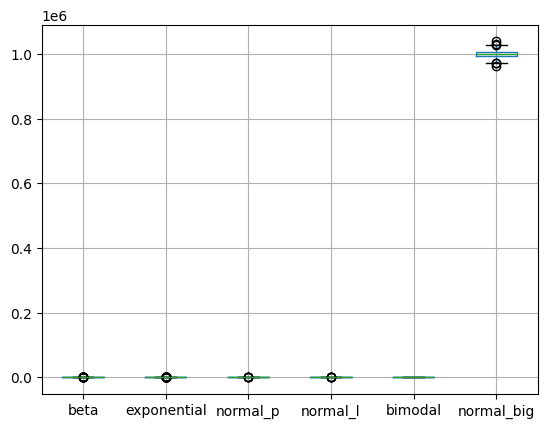

In [20]:
df.boxplot()

In [21]:
s_scaler = StandardScaler()
df_s = s_scaler.fit_transform(df)
col_names = list(df.columns)
df_s = pd.DataFrame(df_s, columns=col_names)
df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,-1.618814,0.943444,-0.325934,0.320923,1.037350,-2.511750
1,0.967673,-0.661809,1.887210,0.180177,1.273897,-1.059387
2,-1.361644,0.738770,1.715928,-2.454743,1.047473,-0.448450
3,0.743785,-0.833090,0.957997,0.126154,1.162013,1.228456
4,0.842711,-0.337825,-1.596117,-1.133233,1.390030,-0.483615


<Axes: ylabel='Density'>

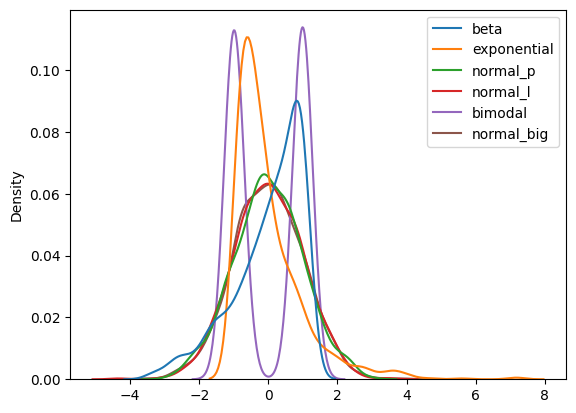

In [22]:
sns.kdeplot(data=df_s)

In [23]:
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-1.501022e-16,7.460699e-17,4.121148e-16,-3.641532e-17,-1.705303e-16,-6.323830e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-3.417331e+00,-9.430884e-01,-2.912249e+00,-4.335810e+00,-1.437703e+00,-3.539351e+00
25%,-5.341591e-01,-6.750105e-01,-6.557056e-01,-6.727571e-01,-9.942121e-01,-7.079270e-01
50%,2.564060e-01,-3.153824e-01,-1.066952e-02,-3.404792e-03,5.263682e-03,1.147807e-03
75%,8.174737e-01,3.374988e-01,6.788603e-01,7.082375e-01,9.926154e-01,6.722731e-01
max,1.169764e+00,7.209130e+00,2.946965e+00,3.559306e+00,1.443288e+00,3.876835e+00


<Axes: >

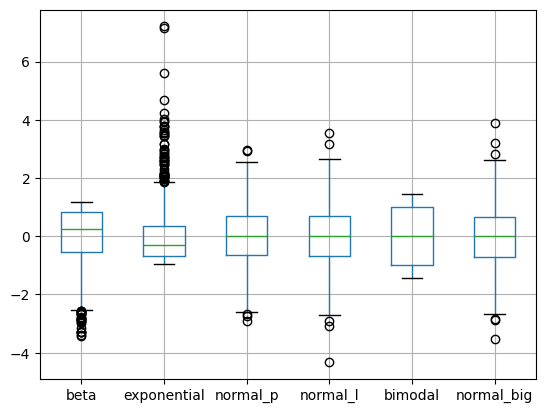

In [24]:
df_s.boxplot()